In [1]:
import pandas as pd

In [3]:
# Read participants.csv and report statistics on subjects of interest

participants = pd.read_csv('data/participants.tsv', sep='\t')

display(participants.head()) 


,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
0,sub-10159,CONTROL,30,F,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
1,sub-10171,CONTROL,24,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
2,sub-10189,CONTROL,49,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
3,sub-10193,CONTROL,40,M,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35343.0,No_ghost
4,sub-10206,CONTROL,21,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost


In [4]:
# count the number of subject of each diagnosis

diagnosis_counts = participants['diagnosis'].value_counts()

display(diagnosis_counts)



diagnosis
CONTROL    130
SCHZ        50
BIPOLAR     49
ADHD        43
Name: count, dtype: int64

In [9]:
# get the subset of CONTROL and ADHD subjects

control_subjects = participants[participants['diagnosis'] == 'CONTROL']
adhd_subjects = participants[participants['diagnosis'] == 'ADHD']

# remove the subjects with missing values in scap column

control_subjects = control_subjects[control_subjects['scap'].notna()]
adhd_subjects = adhd_subjects[adhd_subjects['scap'].notna()]

display(control_subjects.head())
display(adhd_subjects.head())

print(f"Number of control subjects: {len(control_subjects)}")
print(f"Number of ADHD subjects: {len(adhd_subjects)}")


,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
0,sub-10159,CONTROL,30,F,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
1,sub-10171,CONTROL,24,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
2,sub-10189,CONTROL,49,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
4,sub-10206,CONTROL,21,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
5,sub-10217,CONTROL,33,F,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost


,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
229,sub-70001,ADHD,50,F,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
231,sub-70004,ADHD,26,F,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
232,sub-70007,ADHD,32,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
233,sub-70010,ADHD,48,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,35343.0,No_ghost
234,sub-70015,ADHD,50,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost


Number of control subjects: 127
Number of ADHD subjects: 42


In [ ]:
# count and remove ghost-present subjects from the control and adhd subjects

control_ghost_present = control_subjects[control_subjects['ghost_NoGhost'] == 'ghost']
adhd_ghost_present = adhd_subjects[adhd_subjects['ghost_NoGhost'] == 'ghost']

display(control_ghost_present.head())
display(adhd_ghost_present.head())

print(f"Number of control subjects with ghost: {len(control_ghost_present)}")
print(f"Number of ADHD subjects with ghost: {len(adhd_ghost_present)}")


control_subjects = control_subjects[~control_subjects['ghost_NoGhost'].isin(['ghost'])]
adhd_subjects = adhd_subjects[~adhd_subjects['ghost_NoGhost'].isin(['ghost'])]

n_control_subjects = len(control_subjects)
n_adhd_subjects = len(adhd_subjects)

print(f"Number of control subjects after removing ghost: {len(control_subjects)}")
print(f"Number of ADHD subjects after removing ghost: {len(adhd_subjects)}")




,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
18,sub-10299,CONTROL,25,M,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,35343.0,ghost
20,sub-10316,CONTROL,29,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
34,sub-10428,CONTROL,25,F,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,35343.0,ghost
40,sub-10460,CONTROL,40,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
45,sub-10501,CONTROL,21,F,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,35343.0,ghost


,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
232,sub-70007,ADHD,32,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
236,sub-70020,ADHD,50,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
243,sub-70035,ADHD,49,F,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,35343.0,ghost
244,sub-70036,ADHD,48,F,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,35343.0,ghost
250,sub-70051,ADHD,21,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35343.0,ghost


Number of control subjects with ghost: 19
Number of ADHD subjects with ghost: 7
Number of control subjects after removing ghost: 108
Number of ADHD subjects after removing ghost: 35


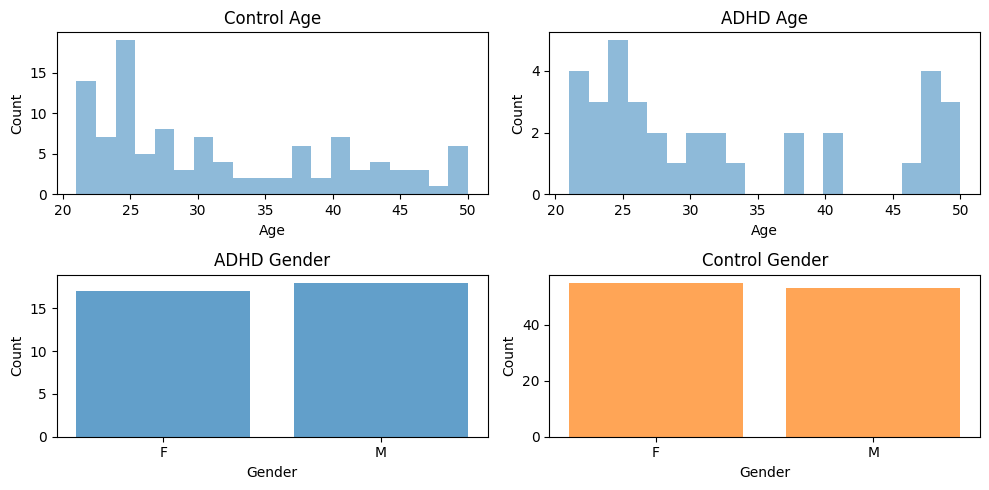

In [31]:
# Basic demographic statistics plot

import matplotlib.pyplot as plt

# plot side by side bar plot of the number of subjects in control and adhd groups

# gender and age


def plot_demographics(control_df, adhd_df):
    fig, axes = plt.subplots(figsize=(10, 5), ncols=2, nrows=2)

    # Age histograms
    axes[0, 1].hist(adhd_df['age'], bins=20, alpha=0.5, label='ADHD')
    axes[0, 1].set_title('ADHD Age')
    axes[0, 1].set_xlabel('Age')
    axes[0, 1].set_ylabel('Count')

    axes[0, 0].hist(control_df['age'], bins=20, alpha=0.5, label='Control')
    axes[0, 0].set_title('Control Age')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Count')

    # Gender bar plots
    adhd_gender_counts = adhd_df['gender'].value_counts().sort_index()
    control_gender_counts = control_df['gender'].value_counts().sort_index()

    axes[1, 0].bar(adhd_gender_counts.index, adhd_gender_counts.values, color='tab:blue', alpha=0.7)
    axes[1, 0].set_title('ADHD Gender')
    axes[1, 0].set_xlabel('Gender')
    axes[1, 0].set_ylabel('Count')

    axes[1, 1].bar(control_gender_counts.index, control_gender_counts.values, color='tab:orange', alpha=0.7)
    axes[1, 1].set_title('Control Gender')
    axes[1, 1].set_xlabel('Gender')
    axes[1, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_demographics(control_subjects, adhd_subjects)



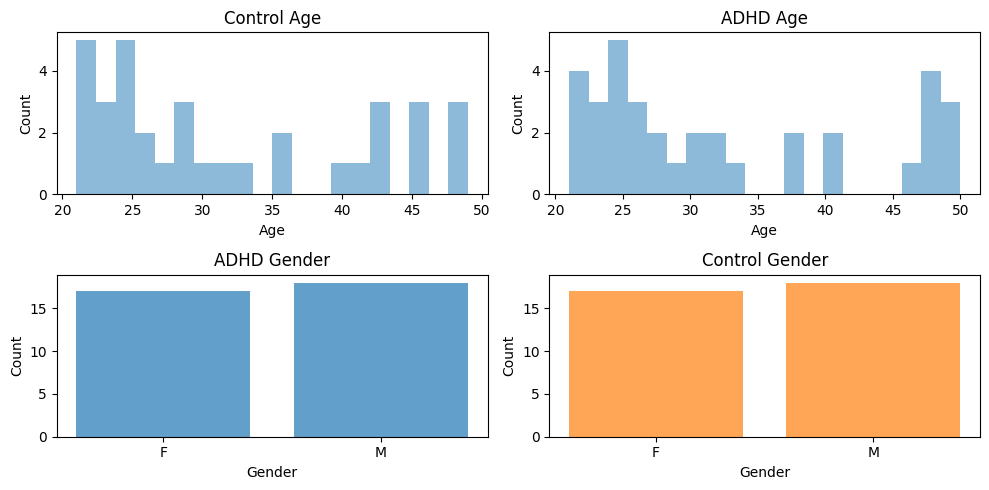

In [ ]:
# sample n_adhd_subjects from adhd_subjects and n_control_subjects from control_subjects to balance the number of subjects in the two groups and save analysis time

# choose a random seed to ensure the reproducibility of the results
# a better approach could be stratified sampling based on the age and gender but we will leave it for now

balanced_control_subjects = control_subjects.sample(n=n_adhd_subjects, random_state=123)


plot_demographics(balanced_control_subjects, adhd_subjects)



In [39]:
control_subjects_ids = balanced_control_subjects['participant_id'].tolist()
adhd_subjects_ids = adhd_subjects['participant_id'].tolist()

print(f"Names of the control subjects: {control_subjects_ids}")
print(f"Names of the adhd subjects: {adhd_subjects_ids}")

# save the names of the subjects to a file, delimited by space

with open('control_subjects_ids.txt', 'w') as f:
    for subject_id in control_subjects_ids:
        f.write(f"{subject_id}\r\n")

with open('adhd_subjects_ids.txt', 'w') as f:
    for subject_id in adhd_subjects_ids:
        f.write(f"{subject_id}\r\n")

Names of the control subjects: ['sub-10998', 'sub-11106', 'sub-11044', 'sub-10524', 'sub-10708', 'sub-10429', 'sub-10274', 'sub-10680', 'sub-10487', 'sub-10235', 'sub-10225', 'sub-10159', 'sub-10882', 'sub-10746', 'sub-10217', 'sub-10719', 'sub-11059', 'sub-10376', 'sub-10523', 'sub-10844', 'sub-10963', 'sub-10440', 'sub-10377', 'sub-11108', 'sub-10672', 'sub-10345', 'sub-10249', 'sub-10674', 'sub-10347', 'sub-10325', 'sub-11088', 'sub-10455', 'sub-11062', 'sub-10871', 'sub-10339']
Names of the adhd subjects: ['sub-70001', 'sub-70004', 'sub-70010', 'sub-70015', 'sub-70017', 'sub-70021', 'sub-70022', 'sub-70026', 'sub-70029', 'sub-70033', 'sub-70034', 'sub-70037', 'sub-70040', 'sub-70046', 'sub-70048', 'sub-70049', 'sub-70052', 'sub-70055', 'sub-70057', 'sub-70058', 'sub-70061', 'sub-70065', 'sub-70068', 'sub-70069', 'sub-70070', 'sub-70073', 'sub-70074', 'sub-70075', 'sub-70076', 'sub-70077', 'sub-70079', 'sub-70080', 'sub-70081', 'sub-70083', 'sub-70086']
